### Q1. Sepal.Lenght를 종속변수로 Sepal.Width를 독립변수로 하여 단순선형회귀분석을 실시하시오.
단 변수명때문에 에러가 나는 경우 변수명을 임의로 변경하고 실시하시오.

In [63]:
import pandas as pd
from statsmodels.formula.api import ols 
iris = pd.read_excel("DS_lv1/iris_xlsx.xlsx")
iris.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [64]:
# 이름 안바꾸면 오류뜸.
iris = iris.rename(columns = {"Sepal.Length" : "SL" , "Sepal.Width" : "SW"})

In [65]:
model = ols("SL ~ SW", data = iris).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     SL   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.074
Date:                Fri, 29 Oct 2021   Prob (F-statistic):              0.152
Time:                        10:36:07   Log-Likelihood:                -183.00
No. Observations:                 150   AIC:                             370.0
Df Residuals:                     148   BIC:                             376.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5262      0.479     13.628      0.0

### Q2. 1번의 회귀분석 결과에서 모델의 선형성 검정 결과 p-value를 확인하시오.

In [66]:
# p_value : 검정통계량에 대한 확률
model.f_pvalue

0.15189826071144713

### Q3. 1번의 회귀분석 결과에서 회귀식을 확인하고 이를 기술하시오

In [85]:
print(model.params)  # y = -1.083558x + 2.229940

Intercept    1.083558
PW           2.229940
dtype: float64


### Q4. Petal.Length를 종속변수로 하고, Petal.Width를 독립변수로 하여 그 결과를 확인하시오.

In [86]:
iris = iris.rename(columns = {"Petal.Length" : "PL" , "Petal.Width" : "PW"})

In [88]:
# 회귀 모형 적합시키기
model = ols("PL ~ PW", data = iris).fit()

# 상세한 통계량 제공
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PL   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           4.68e-86
Time:                        10:56:51   Log-Likelihood:                -101.18
No. Observations:                 150   AIC:                             206.4
Df Residuals:                     148   BIC:                             212.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0836      0.073     14.850      0.0

In [89]:
iris.head(2)

,SL,SW,PL,PW,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [96]:
# 예측값.
model.predict(iris)

0      1.529546
1      1.529546
2      1.529546
3      1.529546
4      1.529546
         ...   
145    6.212421
146    5.320445
147    5.543439
148    6.212421
149    5.097451
Length: 150, dtype: float64

### Q1. iris 데이터를 학습7, 평가3으로 분리하고 학습데이터를 활용하여 Petal.Length를 종속변수, Petal.Width를 독립변수로 지정하고 단순선형회귀분석을 실시하시오.
random_state는 123으로 지정하시오. 선형회귀분석은 statsmodel의 함수를 사용하시오.

In [72]:
from sklearn.model_selection import train_test_split

In [189]:
iris_train, iris_test = train_test_split(iris, train_size = 0.7,
                                        random_state = 123)  # 샘플링 결과 고정
print(len(iris_train))
print(len(iris_test))
iris_train.head(1)

105
45


,SL,SW,PL,PW,Species
114,5.8,2.8,5.1,2.4,virginica


In [190]:
model = ols("PL ~ PW", data = iris).fit()
model.params

Intercept    1.083558
PW           2.229940
dtype: float64

### Q2. 1번의 모델에서 회귀계수를 반올림하여 소수점 첫째 자리까지 출력하시오.

In [191]:
round(model.params[1],1)

2.2

### Q3. 평가데이터를 사용하여 예측값을 산출하시오.

In [192]:
pred = model.predict(iris_test)
pred[:4]

72     4.428469
112    5.766433
132    5.989427
88     3.982481
dtype: float64

### Q4. 3번의 결과를 사용하여 RMSE를 계산하시오.

In [77]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_true = iris_test["PL"], y_pred = pred)**0.5

0.449693013497934

### Q5. Petal.Width가 3.12인 경우 Petal.Length는 값이 어떠한가?

In [78]:
model.predict(pd.DataFrame({"PW" : [3.12]}))

0    8.040972
dtype: float64

In [79]:
from sklearn.linear_model import LinearRegression
# LinearRegression이랑 statsmodel 둘다 알고있어야 한다.

In [80]:
 model_sk = LinearRegression().fit(X = iris[["PL"]],
                                  y = iris[["PW"]])

In [81]:
# 상관계수 
model_sk.coef_

array([[0.41575542]])

In [82]:
# y절편
model_sk.intercept_

array([-0.36307552])

In [83]:
model_sk.predict(iris.loc[:3, ["PL"]])

array([[0.21898206],
       [0.21898206],
       [0.17740652],
       [0.2605576 ]])

### Q1. bike 객체를 train 8, test 2로 분리하여 각각 bike_train, bike_test 객체에 저장하고 각 객체의 row 개수를 출력하시오
seed는 246으로 한다.

In [121]:
bike = pd.read_csv("DS_lv1/bike.csv")
bike.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [148]:
bike_train = bike_train.reset_index(drop = True)
bike["datetime"] = pd.to_datetime(bike["datetime"])
bike["is_wend"] = (bike["datetime"].dt.weekday >= 5) + 0
bike.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,is_wend
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1


In [149]:
bike_train, bike_test = train_test_split(bike, train_size = 0.8,
                                        random_state = 246)  # 샘플링 결과 고정
print(len(bike_train))
print(len(bike_test))

8708
2178


### Q2. registered를 종속변수로 하고 주말여부, weather, temp, windspeed 변수를 독립변수로 하여 bike_train으로 학습한 다중선형회귀모델의 결정계수를 반올림하여 소수점 둘째 자리까지 출력하시오.
주말여부 변수는 is_wend로 생성하고 datetime 변수를 활용하여 가공하시오. statsmodels 라이브러리의 함수를 사용하여 회귀분석

(변수를 전부 생성한다음 train, test로 쪼개는게 낫다)

In [150]:
from statsmodels.formula.api import ols

In [151]:
model = ols(formula = "registered ~ is_wend + weather + temp + windspeed", data = bike_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             registered   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     328.8
Date:                Fri, 29 Oct 2021   Prob (F-statistic):          5.77e-264
Time:                        11:39:43   Log-Likelihood:                -55423.
No. Observations:                8708   AIC:                         1.109e+05
Df Residuals:                    8703   BIC:                         1.109e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.4339      6.158      8.678      0.0

In [152]:
round(model.rsquared,2)

0.13

In [153]:
bike["datetime"] = pd.to_datetime(bike["datetime"])
bike["hour"] = bike["datetime"].dt.hour
bike_agg = bike.groupby("hour")["registered"].mean()
bike_agg.head()

hour
0    44.826374
1    27.345815
2    18.080357
3     9.076212
4     5.144796
Name: registered, dtype: float64

<AxesSubplot:xlabel='hour'>

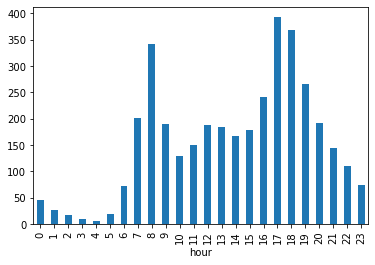

In [154]:
bike_agg.plot(kind = "bar")

### Q1. casual 변수의 시간대별 평균값을 막대그래프로 그리시오.

<AxesSubplot:xlabel='hour'>

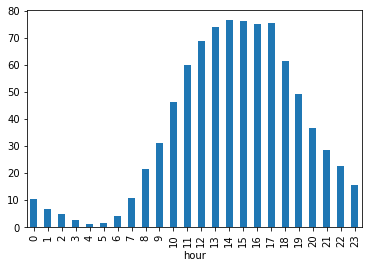

In [156]:
bike_agg2 = bike.groupby("hour")["casual"].mean()
bike_agg2.plot(kind = "bar")

### Q2. registered 요일별 평균값을 막대그래프로 그리시오.

In [157]:
bike["weekday"] = bike["datetime"].dt.weekday
bike.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,is_wend,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,5


<AxesSubplot:xlabel='weekday'>

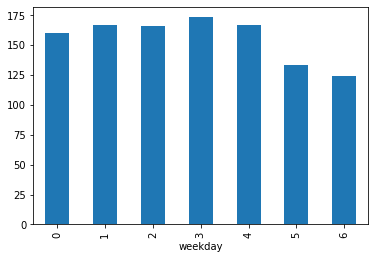

In [158]:
bike_agg3 = bike.groupby("weekday")["registered"].mean()
bike_agg3.plot(kind = "bar")

### Q3. casual 변수의 요일별 평균값을 막대그래프로 그리시오.

<AxesSubplot:xlabel='weekday'>

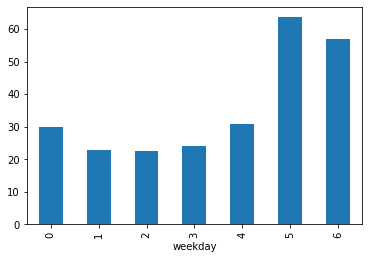

In [159]:
bike_agg4 = bike.groupby("weekday")["casual"].mean()
bike_agg4.plot(kind = "bar")

In [212]:
dia = pd.read_csv("DS_lv1/diamonds.csv")
dia.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [161]:
# one-hot encoding
# "cut" 칼럼을 원핫인코딩한다
dia_dum1 = pd.get_dummies(data = dia, columns = ["cut"])
dia_dum1.head(1)

,carat,color,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0


In [163]:
dia_dum2 = pd.get_dummies(data = dia, columns = ["cut"],
                         drop_first = True)
dia_dum2.head(1)

,carat,color,clarity,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0


In [164]:
dia_dum1.columns

Index(['carat', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z',
       'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good'],
      dtype='object')

In [165]:
dia_dum2 = pd.get_dummies(data = dia, columns = ["cut"],
                         drop_first = True)
dia_dum2.head(1)

,carat,color,clarity,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0


In [168]:
# 여러개 지정하는 방법
"price ~ " + " + ".join(dia.columns[:4])

'price ~ carat + cut + color + clarity'

### Q. dia 객체를 학습 8, 평가 2로 분리하고 학습데이터 세트를 기준으로 다중선형회귀 분석을 실시하시오. 그리고 회귀모델의 결정계수를 반올림하여 소수점 둘째 자리까지 기술하시오.
종속변수는 price, 독립변수는 color, carat으로 지정하시오. <br>
명목형 변수는 원핫인코딩을 실시하고 첫번째 더미 변수는 제거하시오. <br>
데이터 세트 분리시 seed는 234로 지정하시오. <br>

In [196]:
dia_train, dia_test = train_test_split(dia, train_size = 0.8,
                                        random_state = 234)  # 샘플링 결과 고정
print(len(dia_train))
print(len(dia_test))

43152
10788


In [213]:
dia_train.head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
21619,1.12,Ideal,E,VS2,61.9,56.0,9710,6.65,6.68,4.13


In [197]:
model = ols(formula = "price ~ color + carat", data = dia_train).fit()

In [198]:
round(model.rsquared,2)

0.86

In [214]:
dia_dum = pd.get_dummies(data = dia, columns = ["cut", "color", "clarity"])

In [216]:
dia_dum.head(1)

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0


### Q2. 1번에서 생성한 모델을 기준으로 평가 데이터세트를 활용하여 예측값을 생산하고 MAE를 계산하시오.
단, 결과값은 반올림하여 소수점 셋째 자리까지 출력하시오.

In [202]:
pred = round(model.predict(dia_test))

In [203]:
# 끝에 as mae 로 해줘도 된다
from sklearn.metrics import mean_absolute_error

In [204]:
dia_test["price"]

9832      4672
7384       579
27825      650
42669     1334
18151     7356
         ...  
24097    12247
14816     5967
27673    18691
3071      3312
27442    18069
Name: price, Length: 10788, dtype: int64

In [217]:
round(mean_absolute_error(y_true = dia_test["price"], y_pred = pred),3)

979.726

### Q3. 색상이 J이면서 1캐럿인 다이아몬드의 가격은 얼마인가?
1번에서 생성한 모델을 기준으로 연산하시오.

In [206]:
model.predict(pd.DataFrame({"color" : ["J"],
                           "carat" : [1]}))

0    4006.026615
dtype: float64

In [218]:
test_1row = dia_train.iloc[[0], 1:].reset_index(drop = True)
test_1row["color_E"] = 0
test_1row["color_J"] = 1
test_1row["carat"] = 1
test_1row

,cut,color,clarity,depth,table,price,x,y,z,color_E,color_J,carat
0,Ideal,E,VS2,61.9,56.0,9710,6.65,6.68,4.13,0,1,1


In [219]:
# 승산비 계산하기
from statsmodels.api import Logit

In [221]:
df = pd.read_csv("DS_lv1/logistic_regression_01.csv")
df.head(2)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3


In [223]:
model = Logit(endog = df[["admit"]], exog = df.drop("admit", axis=1)).fit()

Optimization terminated successfully.
         Current function value: 0.586372
         Iterations 5


In [224]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Fri, 29 Oct 2021   Pseudo R-squ.:                 0.06176
Time:                        15:43:38   Log-Likelihood:                -234.55
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 1.971e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0015      0.001      1.420      0.155      -0.001       0.004
gpa           -0.0042      0.201     -0.021      0.983      -0.398       0.390
rank          -0.6695      0.121     -5.527      0.000      -0.907      -0.432
==============================================================================
"""

In [225]:
import numpy as np

In [226]:
model.params

gre     0.001477
gpa    -0.004167
rank   -0.669538
dtype: float64

In [227]:
np.exp(model.params) # 승산비(Odds Ratio)

gre     1.001478
gpa     0.995842
rank    0.511945
dtype: float64

### Q. 다음 classification_data_01.csv 파일의 데이터를 사용하여 분석을 실시하시오.

In [229]:
df = pd.read_csv("DS_lv1/classification_data_01.csv")
df.head(2)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0


### Q1. 학습과 평가를 7:3으로 분리하고 이항 로지스틱 회귀분석을 실시하고, 각 독립변수의 OR(Odds Ratio)를 계산하시오.
statsmodels 라이브러리의 함수를 사용하시오. <br>
seed는 567로 지정하시오. <br>
결과값은 반올림하여 소수점 둘째 자리까지 표기하시오.

In [231]:
from statsmodels.api import Logit

In [230]:
df_train, df_test = train_test_split(df, train_size = 0.7,
                                        random_state = 567)  # 샘플링 결과 고정
print(len(df_train))
print(len(df_test))

960
412


In [239]:
# endog : 종속변수
model = Logit(endog = df_train[["Class"]], exog = df_train.drop("Class", axis=1)).fit()

Optimization terminated successfully.
         Current function value: 0.102186
         Iterations 11


In [248]:
round(np.exp(model.params), 2) # 승산비(Odds Ratio)

Variance    0.07
Skewness    0.19
Curtosis    0.17
Entropy     0.43
dtype: float64

### Q2. 평가 데이터세트로 1번에서 생성한 모델을 활용하여 예측값을 생산하시오. 이때 예측값 중 최대값과 최소값을 확인하시오.

In [249]:
# 독립변수만으로 예측값을 내야 한다. Class(종속변수)는 drop함. 안그러면 오류뜸!
pred = model.predict(df_test.drop("Class", axis = 1))

In [250]:
print(min(pred))
print(max(pred))

8.466990097583408e-11
0.9999912797481564


In [257]:
# 로지스틱 회귀분석은 분류방법이기 때문에 경계값이 필요함
# 0.5가 넘는 값은 1, 아니면 0으로 만들어준다.
pred_class = (pred > 0.5) + 0
pred_class[:4]

340     0
21      0
1011    1
1330    1
dtype: int32

In [252]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [253]:
accuracy_score(y_true = df_test["Class"], y_pred = pred_class)

0.9660194174757282

In [254]:
pd.crosstab(df_test["Class"], pred_class)

col_0,0,1
Class,,
0,235,0
1,14,163


In [255]:
from sklearn.metrics import roc_auc_score

In [258]:
roc_auc_score(y_true = df_test["Class"], y_score = pred) # 분류된 값이 아닌 확률값을 넣어야 함(pred_class 말고 pred)

0.9990143046039187

In [259]:
# 의사결정나무

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [260]:
model_c = DecisionTreeClassifier(random_state = 123).fit(X = df.loc[:, :"Entropy"],
                                                        y = df[["Class"]])

In [261]:
pred_class = model_c.predict(df.loc[:, :"Entropy"])
pred_class

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [262]:
accuracy_score(y_true = df["Class"], y_pred = pred_class)

1.0

In [263]:
df_train, df_test = train_test_split(df, train_size = 0.6, random_state = 999)

In [271]:
model_c = DecisionTreeClassifier(random_state = 999, max_depth = 2) # max_depth 안써주면 과적합
model_c = model_c.fit(X = df_train.loc[:, :"Entropy"],
                     y = df_train[["Class"]])

In [272]:
model_c.predict_proba(df_test.loc[:, :"Entropy"]) # proba : probability (확률값)

array([[0.71296296, 0.28703704],
       [0.96944444, 0.03055556],
       [0.96944444, 0.03055556],
       ...,
       [0.96944444, 0.03055556],
       [0.96944444, 0.03055556],
       [0.23076923, 0.76923077]])

In [273]:
model_c.predict(df_test.loc[:, :"Entropy"])

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,